SMS SPAM Classification

In [44]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("spam.csv")
print(dataset)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
1519   ham              Check wid corect speling i.e. Sarcasm        NaN   
1520  spam  URGENT! Your Mobile No was awarded a �2,000 Bo...        NaN   
1521   ham            Are you angry with me. What happen dear        NaN   
1522   ham  I thk u dun haf 2 hint in e forum already lor....        NaN   
1523   ham                                    Yup ok thanx...        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          1524 non-null   object
 1   v2          1524 non-null   object
 2   Unnamed: 2  11 non-null     object
 3   Unnamed: 3  4 non-null      object
 4   Unnamed: 4  2 non-null      object
dtypes: object(5)
memory usage: 59.7+ KB


In [46]:
dataset.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,1524,1524,11,4,2
unique,2,1475,10,3,2
top,ham,"Sorry, I'll call later",PO Box 5249,"MK17 92H. 450Ppw 16""","just Keep-in-touch\"" gdeve.."""
freq,1304,9,2,2,1


In [47]:
dataset['v1']
dataset['v1'] = dataset['v1'].map({'ham' : 0,
                     'spam' : 1})
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
1519,0,Check wid corect speling i.e. Sarcasm,NaN,NaN,NaN
1520,1,"URGENT! Your Mobile No was awarded a �2,000 Bo...",NaN,NaN,NaN
1521,0,Are you angry with me. What happen dear,NaN,NaN,NaN
1522,0,I thk u dun haf 2 hint in e forum already lor....,NaN,NaN,NaN


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

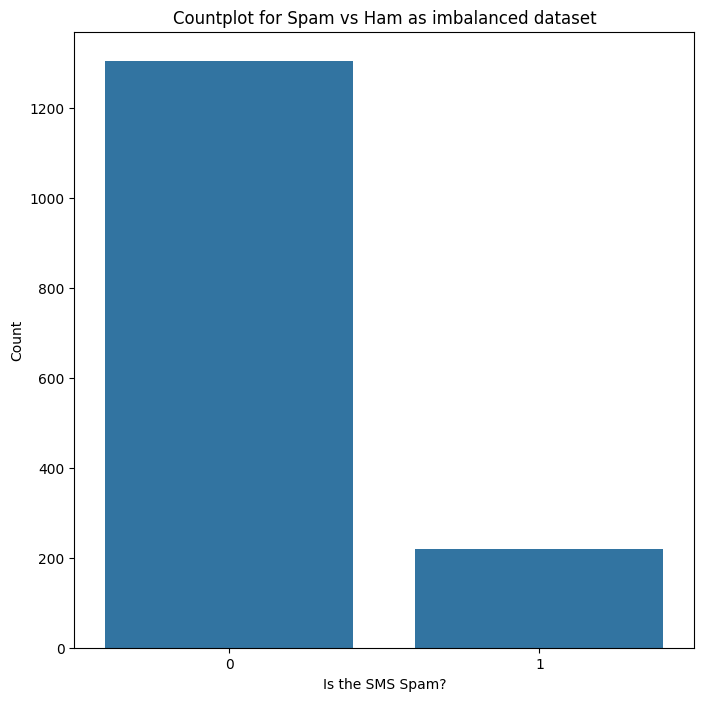

In [49]:
plt.figure(figsize=(8,8))
g = sns.countplot(x = "v1" , data = dataset)
plt.title('Countplot for Spam vs Ham as imbalanced dataset')
p = plt.xlabel('Is the SMS Spam?')
p = plt.ylabel('Count')

Handling imbalanced dataset using Oversampling

coloumn_name = 'v1'

In [50]:
only_spam = dataset[dataset['v1'] == 1]
print(only_spam)

      v1                                                 v2 Unnamed: 2  \
2      1  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
5      1  FreeMsg Hey there darling it's been 3 week's n...        NaN   
8      1  WINNER!! As a valued network customer you have...        NaN   
9      1  Had your mobile 11 months or more? U R entitle...        NaN   
11     1  SIX chances to win CASH! From 100 to 20,000 po...        NaN   
...   ..                                                ...        ...   
1499   1  SMS. ac JSco: Energy is high, but u may not kn...        NaN   
1501   1  HOT LIVE FANTASIES call now 08707509020 Just 2...        NaN   
1506   1  Thanks for the Vote. Now sing along with the s...        NaN   
1517   1  Our brand new mobile music service is now live...        NaN   
1520   1  URGENT! Your Mobile No was awarded a �2,000 Bo...        NaN   

     Unnamed: 3 Unnamed: 4  
2           NaN        NaN  
5           NaN        NaN  
8           NaN        N

In [51]:
len(dataset) - len(only_spam)

1304

In [52]:
print('no of spam SMS:' , len(dataset))
print('no of ham SMS:' , len(dataset) - len(only_spam))

no of spam SMS: 1524
no of ham SMS: 1304


In [53]:
count = int((dataset.shape[0] - only_spam.shape[0]) / only_spam.shape[0])
count

5

In [54]:
for i in range(0,count-1):
    dataset = pd.concat([dataset, only_spam])

dataset.shape

(2404, 5)

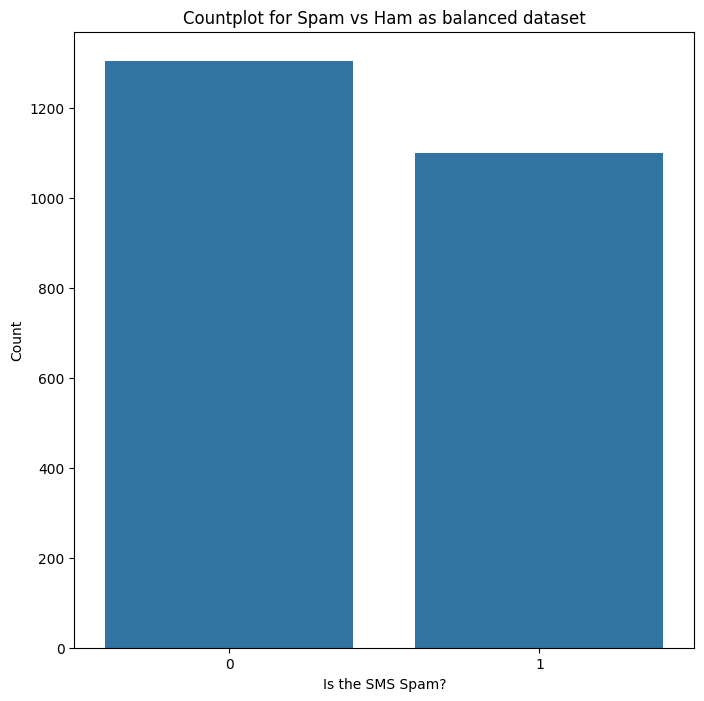

In [55]:
plt.figure(figsize=(8,8))
g = sns.countplot(x = "v1" , data = dataset)
plt.title('Countplot for Spam vs Ham as balanced dataset')
p = plt.xlabel('Is the SMS Spam?')
p = plt.ylabel('Count')

create new feature word count

In [56]:

dataset['word_count'] = dataset['v2'].apply(lambda x : len(x.split()))

In [57]:
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,word_count
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,20
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,28
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,11
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,13
...,...,...,...,...,...,...
1499,1,"SMS. ac JSco: Energy is high, but u may not kn...",NaN,NaN,NaN,28
1501,1,HOT LIVE FANTASIES call now 08707509020 Just 2...,NaN,NaN,NaN,24
1506,1,Thanks for the Vote. Now sing along with the s...,NaN,NaN,NaN,24
1517,1,Our brand new mobile music service is now live...,NaN,NaN,NaN,28


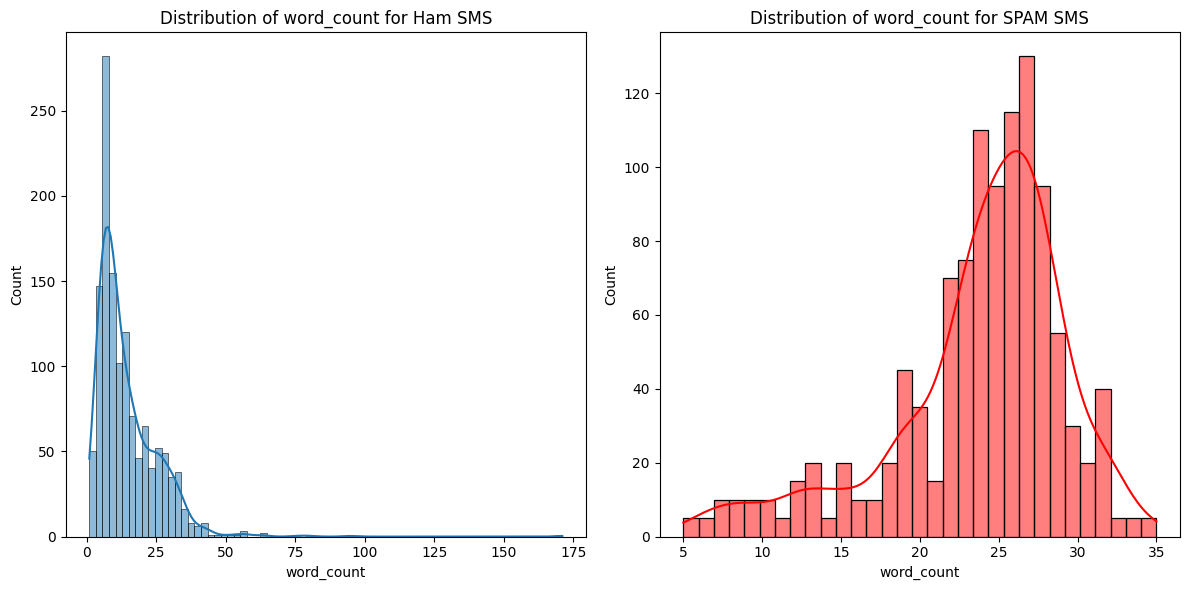

In [58]:
plt.figure(figsize=(12,6))
# (1,1)
plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset['v1']==0].word_count, kde = True)
p = plt.title('Distribution of word_count for Ham SMS')

#(1,2)
plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset['v1']==1].word_count,color='red' ,kde = True)
p = plt.title('Distribution of word_count for SPAM SMS')
plt.tight_layout()
plt.show()


creating new feature of containg currency symbol 

In [59]:

def currency(data):
    currency_symbols = ['$',' € ', '£', '¥','₣', '₹']
    for i in currency_symbols:
        if i in data:
            return i 
    return 0 
    

In [60]:
dataset['contains_currency_symbols'] = dataset["v2"].apply(currency)

In [61]:
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,20,0
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,28,0
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,13,0
...,...,...,...,...,...,...,...
1499,1,"SMS. ac JSco: Energy is high, but u may not kn...",NaN,NaN,NaN,28,0
1501,1,HOT LIVE FANTASIES call now 08707509020 Just 2...,NaN,NaN,NaN,24,0
1506,1,Thanks for the Vote. Now sing along with the s...,NaN,NaN,NaN,24,0
1517,1,Our brand new mobile music service is now live...,NaN,NaN,NaN,28,0


countplot for contains-currency_symbols

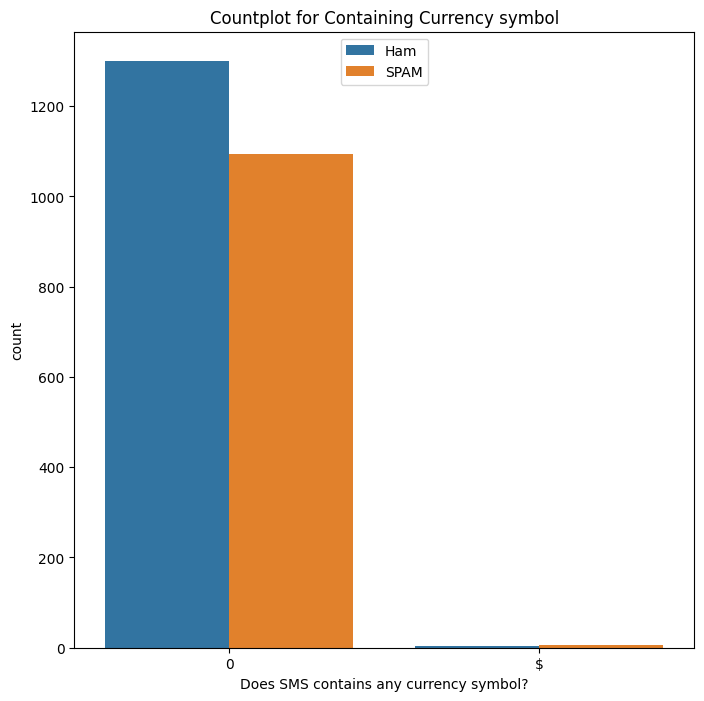

In [62]:

plt.figure(figsize = (8,8))
g = sns.countplot(x = 'contains_currency_symbols', data= dataset, hue = "v1")
p = plt.title("Countplot for Containing Currency symbol")
p = plt.xlabel("Does SMS contains any currency symbol?")
p= plt.ylabel('count')
p = plt.legend(labels = ["Ham" , "SPAM" ], loc = 9)

creating new feature of containing numbers

In [63]:

def number(data):
    for i in data:
        if ord (i)>=48 and ord(i)<=57:
            return 1
    return 0

In [64]:
dataset['contains_number'] = dataset['v2'].apply(number)

In [65]:
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,word_count,contains_currency_symbols,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,20,0,0
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,28,0,1
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,13,0,0
...,...,...,...,...,...,...,...,...
1499,1,"SMS. ac JSco: Energy is high, but u may not kn...",NaN,NaN,NaN,28,0,1
1501,1,HOT LIVE FANTASIES call now 08707509020 Just 2...,NaN,NaN,NaN,24,0,1
1506,1,Thanks for the Vote. Now sing along with the s...,NaN,NaN,NaN,24,0,0
1517,1,Our brand new mobile music service is now live...,NaN,NaN,NaN,28,0,0


countplot from containing numbers

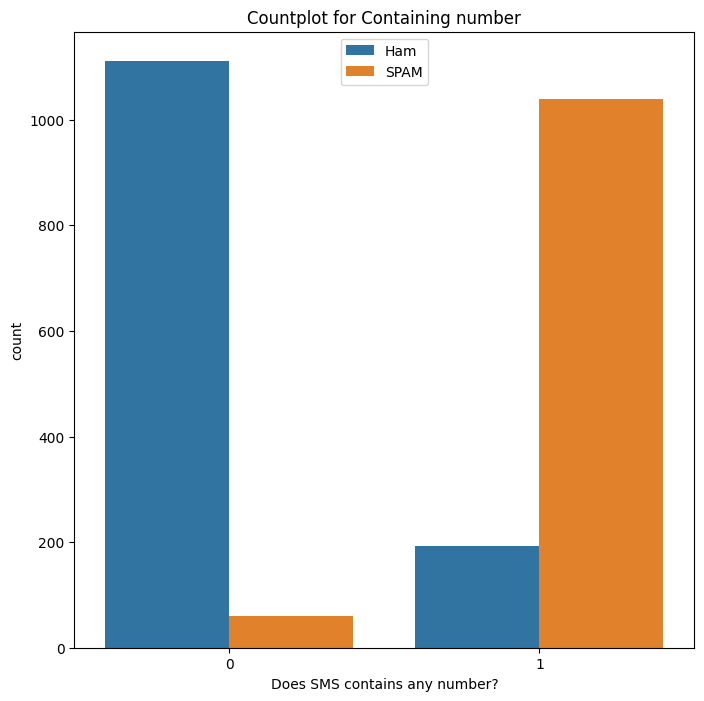

In [66]:

plt.figure(figsize = (8,8))
g = sns.countplot(x = 'contains_number', data= dataset, hue = "v1")
p = plt.title("Countplot for Containing number")
p = plt.xlabel("Does SMS contains any number?")
p= plt.ylabel('count')
p = plt.legend(labels = ["Ham" , "SPAM" ], loc = 9)

Data cleaning

In [67]:

import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [68]:
corpus = []
wml = WordNetLemmatizer()

for sms in list(dataset.v2):  # Assuming dataset.v2 contains the text data
    sms = re.sub(pattern=r'[^a-zA-Z]', repl=' ', string=sms)  # Use r'[^a-zA-Z]' for regex pattern
    sms = sms.lower()
    words = sms.split()
    words = [wml.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    corpus.append(' '.join(words))


In [69]:
corpus


['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

Creating the bag of words model

In [70]:

from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfVectorizer(max_features= 500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()


In [71]:
X = pd.DataFrame(vectors, columns= feature_names)
y = dataset['v1']


In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [73]:
x_train, x_test, y_train,y_test = train_test_split(X ,y ,test_size=0.2, random_state=42)

In [74]:
x_train

,able,ac,access,account,activate,address,admirer,age,ah,alone,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.588007,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254676,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Naive Bayes model

In [75]:

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb , X , y , scoring='f1' , cv= 10)
print(mnb)
print(cv)
print(round(cv.std() , 3))
print(round(cv.mean(), 3))

MultinomialNB()
[0.91774892 0.95454545 0.95927602 0.94170404 0.95495495 0.95454545
 0.95927602 0.96330275 0.95927602 0.9375    ]
0.013
0.95


In [76]:
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)


In [77]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       260
           1       0.96      0.95      0.96       221

    accuracy                           0.96       481
   macro avg       0.96      0.96      0.96       481
weighted avg       0.96      0.96      0.96       481



In [78]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[252,   8],
       [ 10, 211]], dtype=int64)

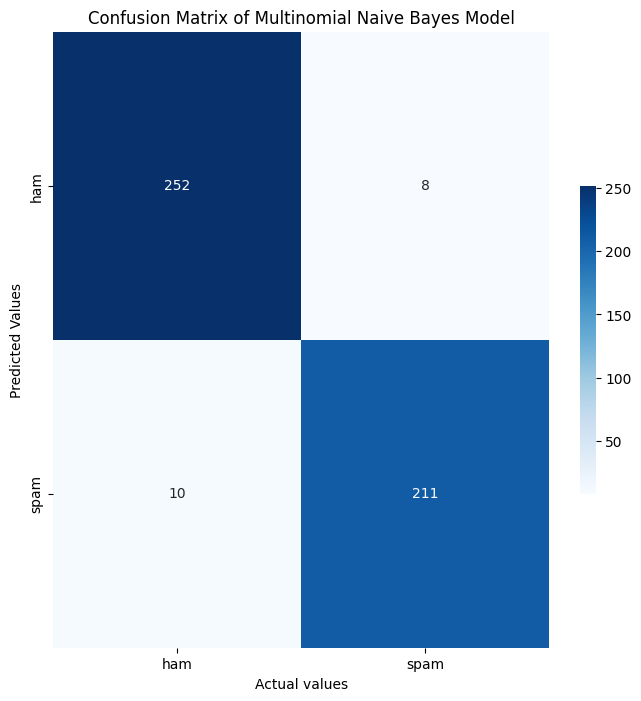

In [79]:
plt.figure(figsize=(8,8))
axis_labels = ['ham' , 'spam']
g = sns.heatmap(data=cm ,xticklabels=axis_labels , yticklabels= axis_labels,annot=True ,fmt = 'g',cbar_kws={"shrink": 0.5}, cmap="Blues")
plt.title('Confusion Matrix of Multinomial Naive Bayes Model')
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted Values')


In [80]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt , X , y , scoring='f1' , cv = 10)
print(round(cv1.std() , 3))
print(round(cv1.mean(), 3))

0.011
0.979


In [81]:
dt.fit(x_train, y_train)
y_pred1 = dt.predict(x_test)

In [82]:
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       1.00      0.95      0.98       260
           1       0.95      1.00      0.97       221

    accuracy                           0.98       481
   macro avg       0.97      0.98      0.97       481
weighted avg       0.98      0.98      0.98       481



In [83]:
cm = confusion_matrix(y_test , y_pred1)
cm

array([[248,  12],
       [  0, 221]], dtype=int64)

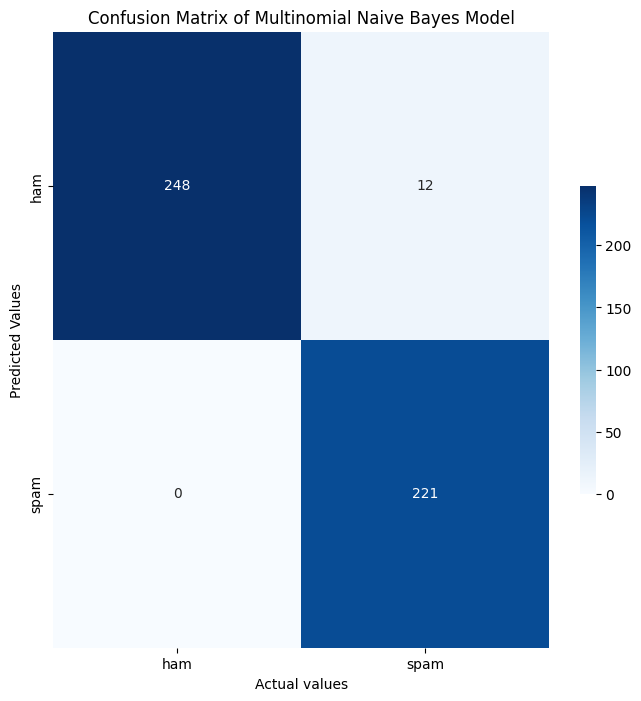

In [84]:
plt.figure(figsize=(8,8))
axis_labels = ['ham' , 'spam']
g = sns.heatmap(data=cm ,xticklabels=axis_labels , yticklabels= axis_labels,annot=True ,fmt = 'g',cbar_kws={"shrink": 0.5}, cmap="Blues")
plt.title('Confusion Matrix of Multinomial Naive Bayes Model')
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted Values')

In [85]:
def predict_spam(sms):
    message = re.sub(pattern=r'[^a-zA-Z]', repl=' ', string=sms)  # Use r'[^a-zA-Z]' for regex pattern
    message = message.lower()
    words = message.split()
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wml.lemmatize(word) for word in filtered_words]
    message = ' '.join(lemm_words)
    temp =  tfidf.transform([message]).toarray()
    return dt.predict(temp)
    # corpus.append(' '.join(words))

In [86]:
sample_message = 'ImPORTANT = you could be entitied up to $3,160 computation from mis-sold PPt on a credit card or loan'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message')
else:
    print('This is a HAM(normal) message')

This is a HAM(normal) message


c:\python_new\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


--------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------